<a href="https://colab.research.google.com/github/Tristan07999/TensorFlow2.0-with-tf.keras/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
try:
  %tensorflow_version 2.0
except excepetation:
  pass


`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc0


In [6]:
#import MNIST(Modified National Institute of Standards and Technology database)
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape


(10000, 28, 28)

In [11]:
len(test_labels)

10000

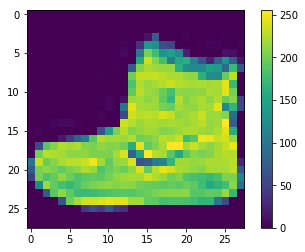

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

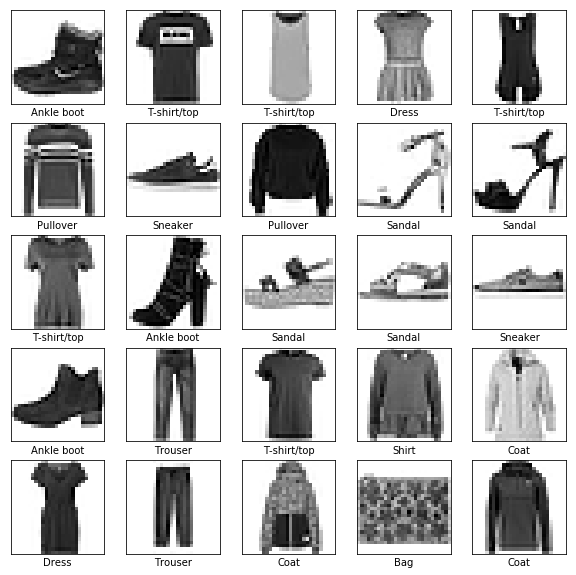

In [13]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#Build up the model with 3 layer NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), ##First layer to flatten the iamge
    keras.layers.Dense(128, activation='relu'), ## first Dense layer has 128 nodes
    keras.layers.Dense(10, activation='softmax') ##The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1
])

In [0]:
#Adding loss function, optimizer and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4995 - accuracy: 0.8247
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3716 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3336 - accuracy: 0.8784
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3083 - accuracy: 0.8866
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2898 - accuracy: 0.8933
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2764 - accuracy: 0.8981
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2651 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2540 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2442 - accuracy: 0.9084
Epoch 10/10
6

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([4.0236250e-09, 2.0373099e-08, 4.6207171e-09, 5.8861460e-10,
       2.3157751e-09, 1.1644639e-05, 1.5332607e-09, 3.0611662e-04,
       2.2334528e-09, 9.9968219e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

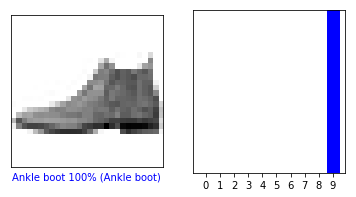

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

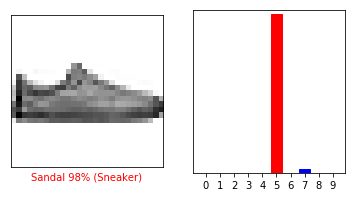

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

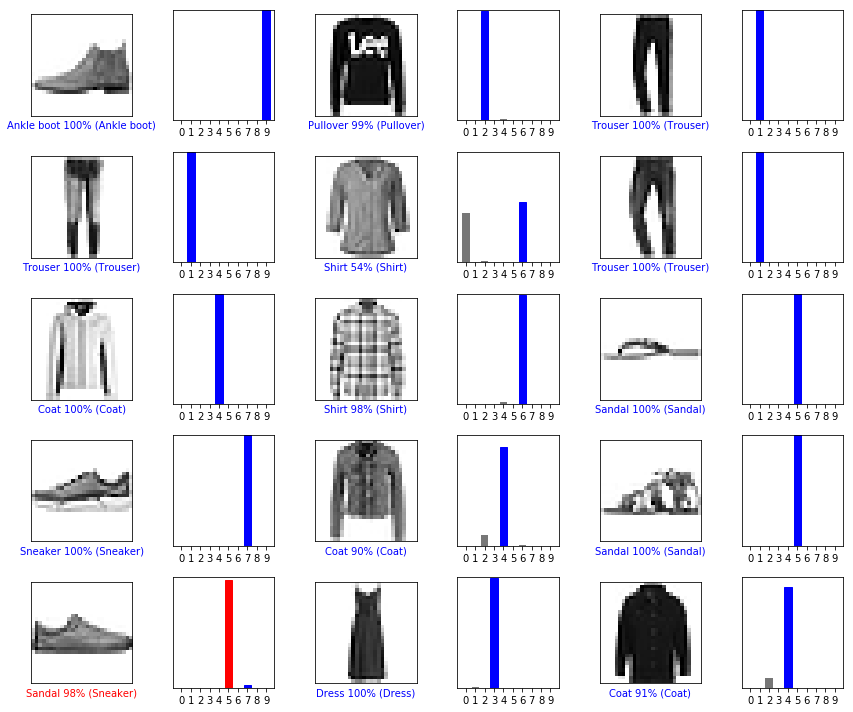

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.7001988e-05 1.1987423e-13 9.8938072e-01 1.0665135e-12 1.0393401e-02
  7.9286378e-12 1.8882794e-04 4.4171681e-13 1.0052868e-08 3.4185550e-13]]


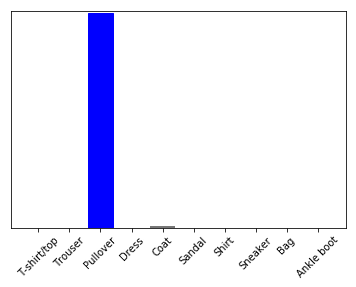

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

2